# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,precision_score
import re    # regular expression
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to C:\Users\GCE-
[nltk_data]     PMNA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GCE-
[nltk_data]     PMNA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\GCE-
[nltk_data]     PMNA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
data_fake=pd.read_csv("Fake.csv",encoding="ISO-8859-1")
data_true=pd.read_csv("True.csv",encoding="ISO-8859-1")

In [4]:
data_fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [5]:
data_fake.shape

(23481, 4)

In [6]:
data_true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [7]:
data_true.shape

(21417, 4)

#  Loading Datasets

In [9]:
data_fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [10]:

data_fake['class']=0
data_fake

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [11]:
data_fake.tail()

,title,text,subject,date,class
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied âSafe Zoneâ Plan ...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


#  Creating Dataset for Model Building

In [13]:
data_true['class']=1
data_true

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [14]:
data_fake.shape,data_true.shape

((23481, 5), (21417, 5))

In [15]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [16]:
data_merge.shape

(44898, 5)

In [17]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
data=data_merge.drop(['title','subject','date'],axis=1)                                                      

In [19]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
data=data.sample(frac=1)  #randomly picking data in 1D

In [21]:
data.head()

,text,class
4752,"For a long time now, the mainstream media has ...",0
9733,MSNBC host Chris Matthews on Thursday accused ...,0
10660,President Trump spoke via pre-recorded video t...,0
9968,Here are a few facts explaining who the DACA r...,0
886,If you have been vacationing under a rock over...,0


In [22]:
data.to_csv('datas')

In [23]:
data.reset_index(inplace=True)
data.head(3)

,index,text,class
0,4752,"For a long time now, the mainstream media has ...",0
1,9733,MSNBC host Chris Matthews on Thursday accused ...,0
2,10660,President Trump spoke via pre-recorded video t...,0


In [24]:
data.drop(['index'],axis=1,inplace=True)

#  EDA

In [26]:
data.columns

Index(['text', 'class'], dtype='object')

In [27]:
data.head()

,text,class
0,"For a long time now, the mainstream media has ...",0
1,MSNBC host Chris Matthews on Thursday accused ...,0
2,President Trump spoke via pre-recorded video t...,0
3,Here are a few facts explaining who the DACA r...,0
4,If you have been vacationing under a rock over...,0


In [28]:
data.shape

(44898, 2)

In [29]:
data.describe()

,class
count,44898.000000
mean,0.477015
std,0.499477
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [30]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   class   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


#  Preprocessing Text Data

In [33]:
lemmatizer = WordNetLemmatizer()

In [35]:
def wordopt(text):  # creating function to process text
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(lemmatized)

In [36]:
data['text']=data['text'].apply(wordopt)

#  Data Visualization

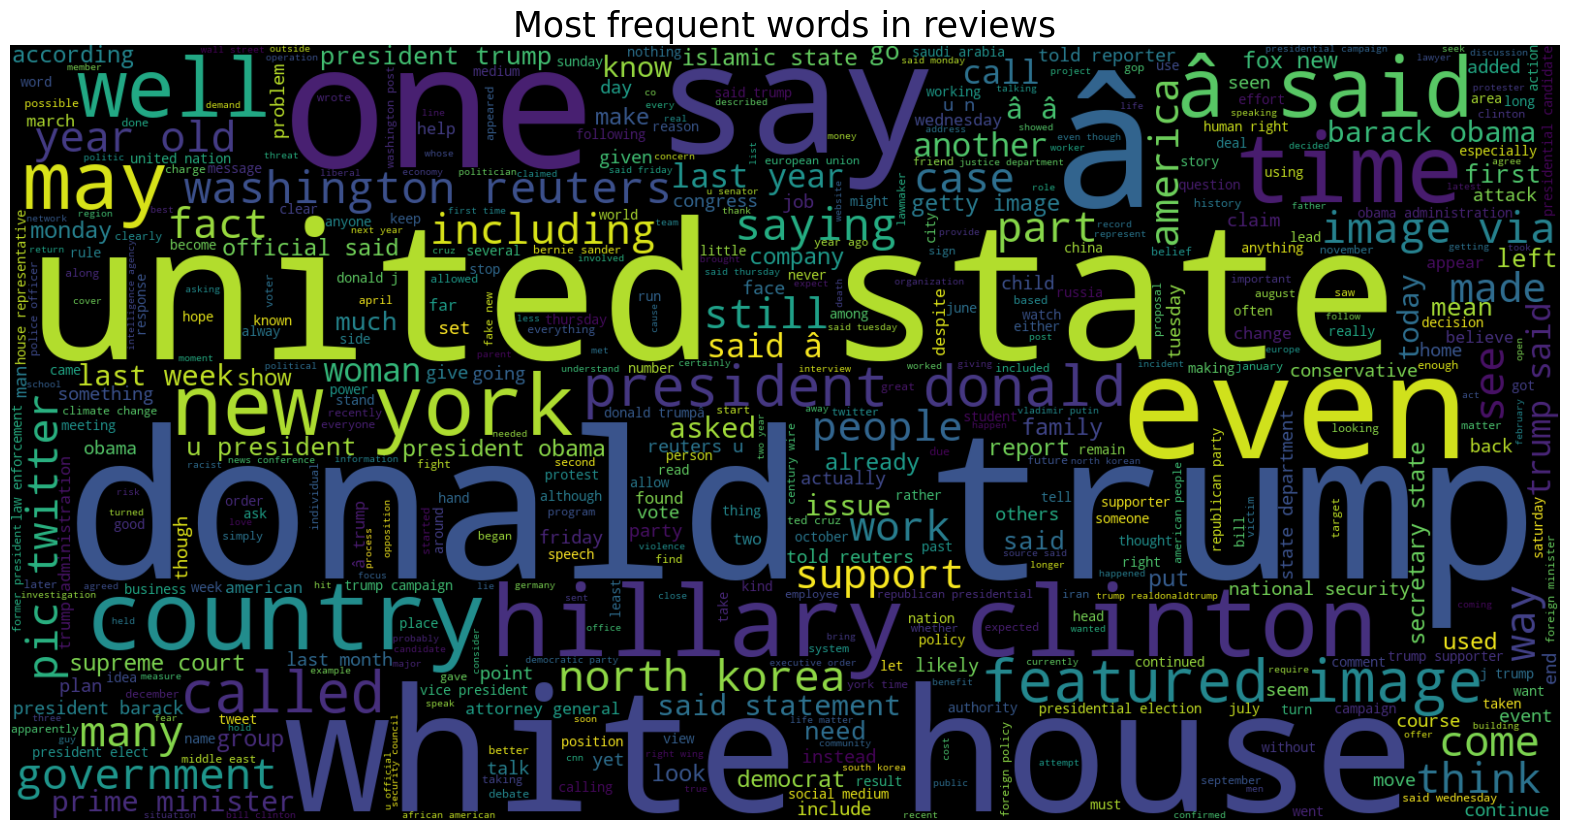

In [38]:
text=' '.join([word for word in data['text']])
plt.figure(figsize=(20,15),facecolor='None')
wordcloud=WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in reviews', fontsize=25)
plt.show()

#  Data Splitting

In [40]:
x=data['text']
y=data['class']

In [41]:
x

0        long time mainstream medium avoided questionin...
1        msnbc host chris matthew thursday accused repu...
2        president trump spoke via pre recorded video c...
3        fact explaining daca recipient really national...
4        vacationing rock weekend might aware donald tr...
                               ...                        
44893    watching donald trump speak think running prom...
44894    anyone believe one second hillary bernie give ...
44895    former senator jim demint speaks wsj obscene s...
44896    hang hang hang hang brooke baldwin desperately...
44897    washington reuters cuba top diplomat warned un...
Name: text, Length: 44898, dtype: object

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [43]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(33673,) (11225,) (33673,) (11225,)


#  NLP

In [45]:

vectorization=TfidfVectorizer()
xv_train=vectorization.fit_transform(x_train)
xv_test=vectorization.transform(x_test)

In [46]:
xv_train

<33673x93723 sparse matrix of type '<class 'numpy.float64'>'
	with 5312954 stored elements in Compressed Sparse Row format>

In [47]:
xv_train.shape

(33673, 93723)

In [48]:
xv_test.shape

(11225, 93723)

#  Model Building

### Logistic Regression 

In [51]:
LR=LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [52]:
pred_lr1=LR.predict(xv_test)
pred_lr1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [53]:
LR_acc=LR.score(xv_test,y_test)
LR_acc

0.9885077951002227

In [54]:
print(classification_report(y_test,pred_lr1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5889
           1       0.99      0.99      0.99      5336

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



### Decision Tree Classifier

In [56]:
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)

DecisionTreeClassifier()

In [57]:
pred_dt1=DT.predict(xv_test)
pred_dt1

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [58]:
pred_dt2=DT.predict(xv_train)
pred_dt2

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [59]:
DT_acc=accuracy_score(y_test,pred_dt1)
DT_acc

0.9971492204899778

In [60]:
precision_score(y_test,pred_dt1)

0.9979346601577168

###  Gradient Boosting Classifier

In [62]:
GB=GradientBoostingClassifier()
GB.fit(xv_train,y_train)

GradientBoostingClassifier()

In [63]:
pred_gb=GB.predict(xv_test)
#pred_gb=GB.predict(xv_train)
pred_gb

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
y_test

22216    0
27917    0
25007    0
1377     0
32476    1
        ..
15578    0
29394    0
3120     0
25388    1
14337    1
Name: class, Length: 11225, dtype: int64

In [65]:
GB_acc=accuracy_score(y_test,pred_gb)
GB_acc

0.9959910913140312

In [66]:
print(classification_report(y_test,pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5889
           1       0.99      1.00      1.00      5336

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225



### Random Forest Classifier 

In [68]:
RF=RandomForestClassifier(random_state=0)
RF.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [69]:
pred_rf=RF.predict(xv_test)

In [70]:
RF_acc=RF.score(xv_test,y_test)
RF_acc

0.9942093541202672

In [71]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_rf))

[[5846   43]
 [  22 5314]]


## Performance Analysis on each model 

In [73]:
pt=[]
t=[]
for i in[LR,GB,RF,DT]:
    i.fit(xv_train,y_train)
    pt.append(round(accuracy_score(y_test,i.predict(xv_test))*100,2))
    t.append(round(accuracy_score(y_train,i.predict(xv_train))*100,2))
print(pt)
print(t)

[98.85, 99.6, 99.42, 99.72]
[99.27, 99.73, 100.0, 100.0]
